# Simple Harmonic Oscillator model

This example shows how the [Simple Harmonic Oscillator model](http://pints.readthedocs.io/en/latest/toy/simple_harmonic_oscillator_model.html) can be used.

A model for a particle undergoing Newtonian dynamics that experiences a force in proportion to its displacement from an equilibrium position, and, in addition, a friction force. The motion of the particle can be determined by solving a pair of coupled ordinary differential equations.

$$ \begin{align}\frac{dy_1(t)}{dt} &= y_2(t)\\
   \frac{dy_2(t)}{dt} &= -y_1(t) - \theta y_2(t)\end{align}.$$

where $y_1(t)$ is the particle's displacement, $y_2(t)$ is its momentum and $\theta$ is the frictional force. For this model, only $y_1(t)$ is returned by the solver.

In [1]:
import pints
import pints.toy
import matplotlib.pyplot as plt
import numpy as np

model = pints.toy.SimpleHarmonicOscillatorModel()

Parameters are given in the order $(y_1(0), y_2(0), \theta)$. Here, we see that since $\theta > 0$, that the oscillations of the particle decay exponentially over time.

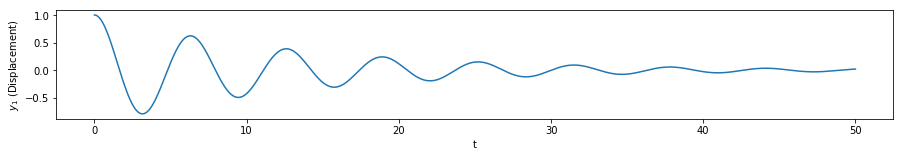

In [2]:
times = np.linspace(0, 50, 1000)
parameters = model.suggested_parameters()
values = model.simulate(parameters, times)

plt.figure(figsize=(15,2))
plt.xlabel('t')
plt.ylabel(r'$y_1$ (Displacement)')
plt.plot(times, values)
plt.show()

If $\theta = 2$, we get critically dampled dynamics rather than oscillatory motion.

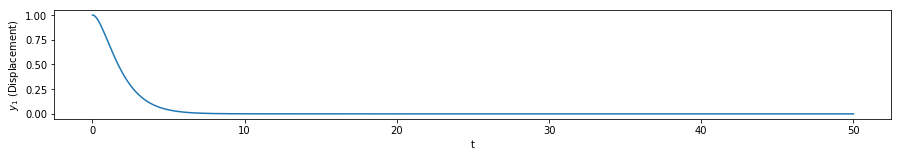

In [3]:
parameters = model.suggested_parameters()
values = model.simulate([1, 0, 2], times)

plt.figure(figsize=(15,2))
plt.xlabel('t')
plt.ylabel(r'$y_1$ (Displacement)')
plt.plot(times, values)
plt.show()

If $\theta > 2$, we get overdamped dynamics.

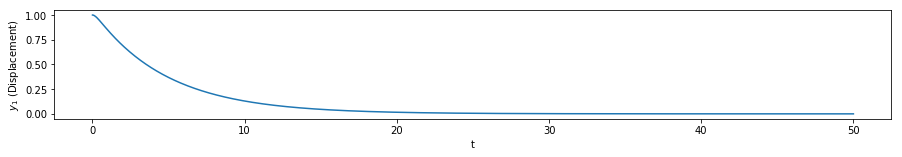

In [4]:
parameters = model.suggested_parameters()
values = model.simulate([1, 0, 5], times)

plt.figure(figsize=(15,2))
plt.xlabel('t')
plt.ylabel(r'$y_1$ (Displacement)')
plt.plot(times, values)
plt.show()

This model also provides sensitivities: derivatives $\frac{\partial y}{\partial p}$ of the output $y$ with respect to the parameters $p$.

In [5]:
values, sensitivities = model.simulateS1(parameters, times)

We can plot these sensitivities, to see where the model is sensitive to each of the parameters:

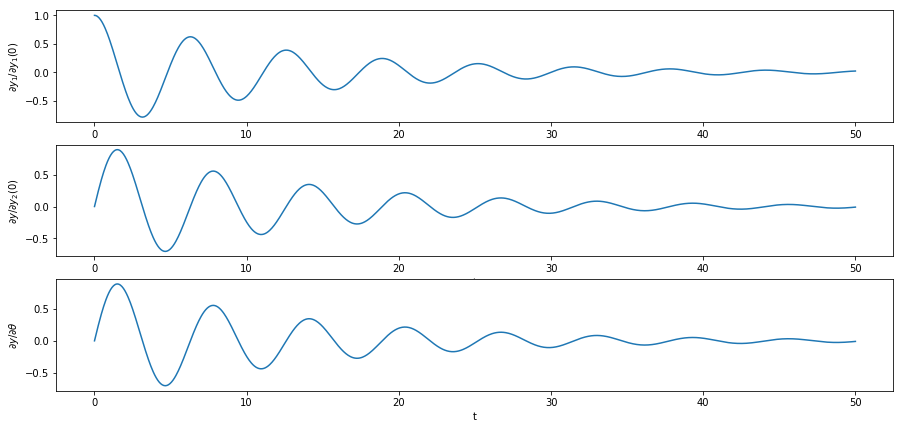

In [6]:
plt.figure(figsize=(15,7))

plt.subplot(3, 1, 1)
plt.ylabel(r'$\partial y_1/\partial y_1(0)$')
plt.plot(times, sensitivities[:, 0])

plt.subplot(3, 1, 2)
plt.xlabel('t')
plt.ylabel(r'$\partial y/\partial y_2(0)$')
plt.plot(times, sensitivities[:, 1])

plt.subplot(3, 1, 3)
plt.xlabel('t')
plt.ylabel(r'$\partial y/\partial \theta$')
plt.plot(times, sensitivities[:, 1])

plt.show()